In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray

from my_functions import *
from my_filters import *


In [2]:
# if pwd is SRC  change to root
print("Current working directory: ", os.getcwd())
if os.path.basename(os.getcwd()) == "SRC":
    os.chdir("..")
print("Current working directory: ", os.getcwd())
print(os.path.basename(os.getcwd()))

Current working directory:  c:\Users\iWiss\Documents\GitHub\Stage_Signal_Physio\SRC
Current working directory:  c:\Users\iWiss\Documents\GitHub\Stage_Signal_Physio
Stage_Signal_Physio


In [3]:
plt.close("all")  # close all figure windows
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['figure.figsize'] = [15, 5]  # Width x Height in inches
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['legend.fontsize'] = 12  # Adjust the size (in points) as needed


In [4]:
# Define the xdf file of interest
xdf_input_filename = "001_MolLud_20201112_1_c.xdf"
# xdf_input_filename="020_DesMar_20211129_1_c.xdf"

xdf_input_filepath = os.path.normpath("DAT/INPUT/"+xdf_input_filename)

In [5]:
# definition of the EEG channels' names
channels_dict = {"Channel_1": "C4",
                 "Channel_2": "FC2",
                 "Channel_3": "FC6",
                 "Channel_4": "CP2",
                 "Channel_5": "C3",
                 "Channel_6": "FC1",
                 "Channel_7": "FC5",
                 "Channel_8": "CP1"}

# EEG

## Import EEG signals and shape data

In [6]:
EEG_data = retrieve_stream_data_from_xdf(xdf_input_filepath=xdf_input_filepath, stream_type="EEG")

EEG_timestamps = EEG_data["data"]["timestamps"] - EEG_data["data"]["timestamps"][0]
EEG_srate = EEG_data["infos"]["sample_rate"]["effective"]
EEG_units = np.unique(EEG_data["infos"]["channels"]["units"])[0]

Accessing stream: 
Type: 'EEG' | Name: 'LSLOutletStreamName-EEG'


## Import event markers and format data

In [7]:
mouse_marker_times_labels = create_marker_times_labels_array2(xdf_input_filepath=xdf_input_filepath)
nearest_markers_array = nearest_timestamps_array_finder(signal_times_stamps=EEG_timestamps, markers=mouse_marker_times_labels)

# make times start in reference to the first EEG timestamp instead of unix epoch.
mouse_marker_times_labels[:, 0] -= EEG_data["data"]["timestamps"][0]

Accessing stream: 
Type: 'Markers' | Name: 'MouseToNIC'
MARKERS LEN: 12


In [8]:
channel_num=5
channel_index=channel_num-1
channel_num_name=f"Channel_{channel_num}"
channel_name=channels_dict[channel_num_name]

## Plot one Raw EEG signal

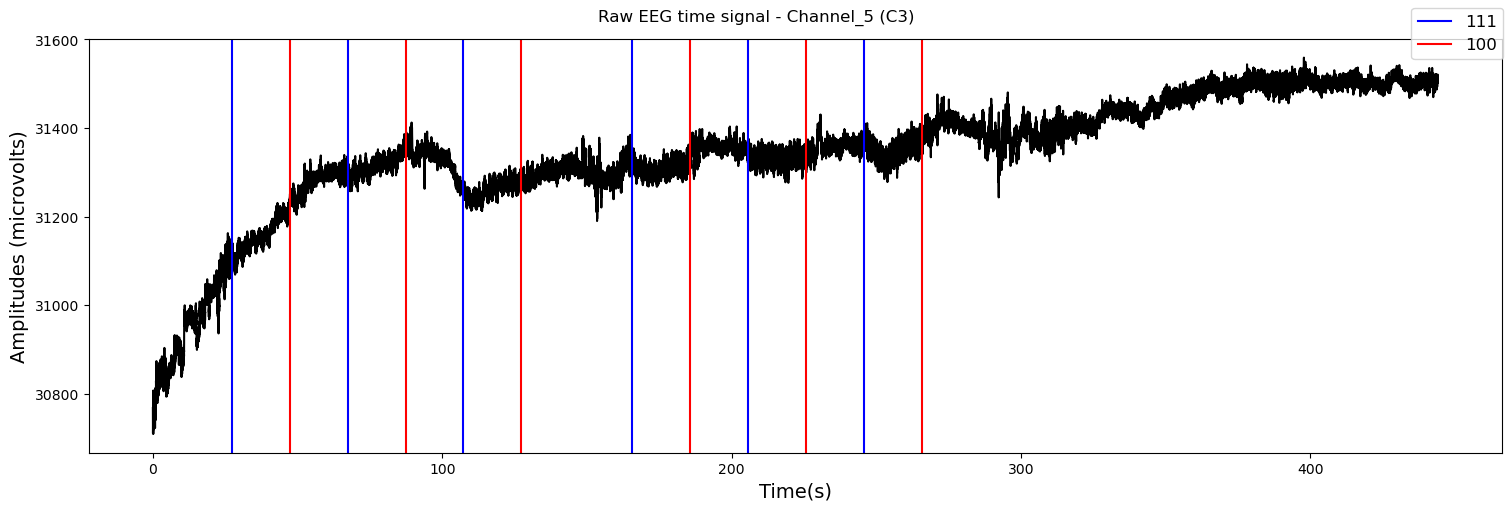

In [9]:
figure,axis=plt.subplots()
figure.suptitle(f"Raw EEG time signal - {channel_num_name} ({channel_name})")
axis.plot(EEG_timestamps,EEG_data["data"]["time_series"][:,channel_index],color="black")
axis.set_xlabel("Time(s)")
axis.set_ylabel(f"Amplitudes ({EEG_units})")
show_markers2(plot_type=axis,markers_times_array=mouse_marker_times_labels)
figure.legend()


## Detrend EEG signals and show result

input_signals shape:
 (221938, 8)
input_signals mean per signal:
 [27897.195 26144.139 28026.402 35319.527 31324.672 24827.713 32372.799
 29788.95 ]


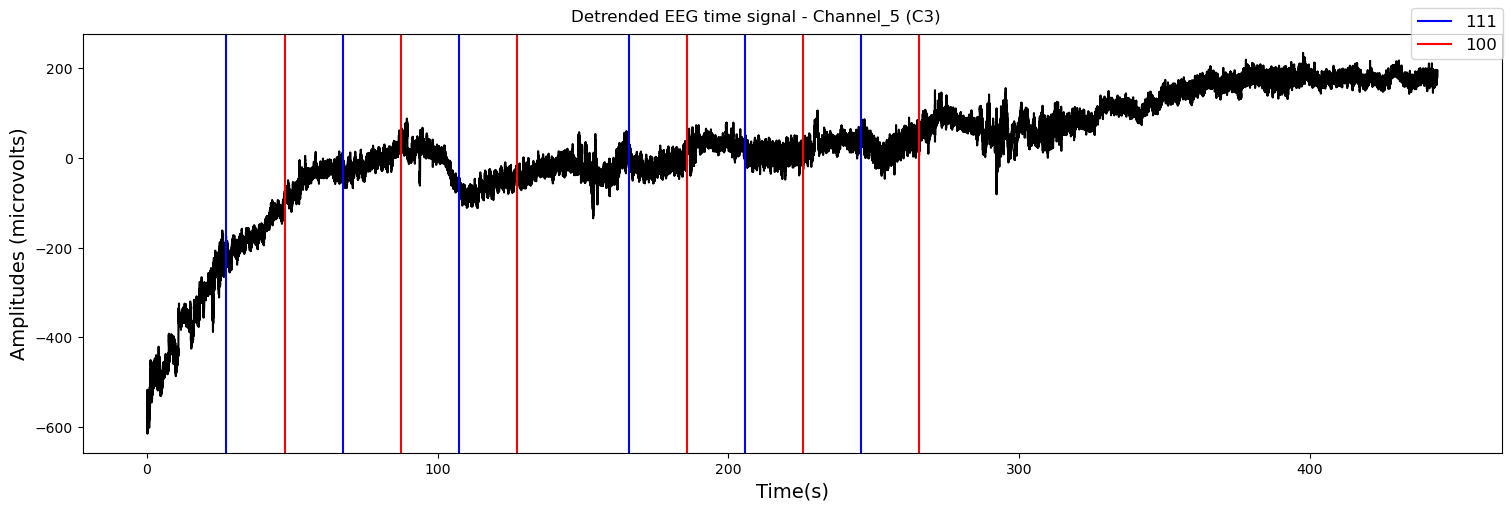

In [10]:
EEG_amplitudes_centered = detrend_signals(EEG_data["data"]["time_series"])

figure,axis=plt.subplots()
figure.suptitle(f"Detrended EEG time signal - {channel_num_name} ({channel_name})")
axis.plot(EEG_timestamps,EEG_amplitudes_centered[:,channel_index],color="black")
axis.set_xlabel("Time(s)")
axis.set_ylabel(f"Amplitudes ({EEG_units})")
show_markers2(plot_type=axis,markers_times_array=mouse_marker_times_labels)
figure.legend()


## Rereference EEG signals to average and show result on one signal

input_signals shape:(221938, 8)
input_signals whole mean:13.818697929382324
mean_vector shape: ()


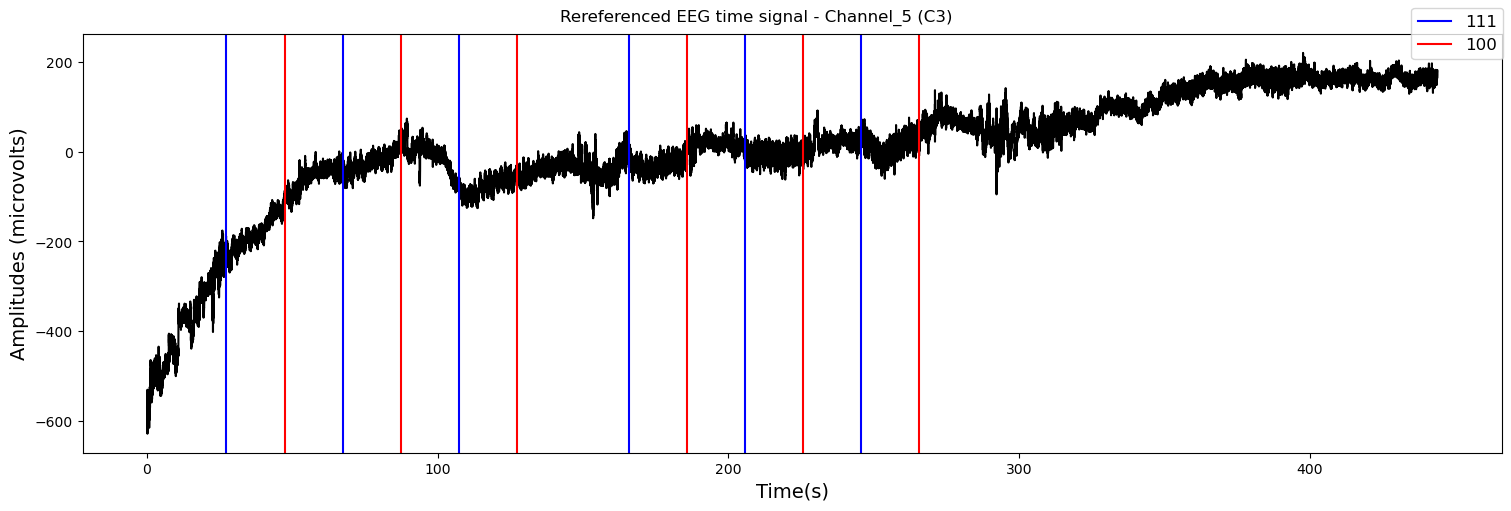

In [11]:
EEG_amplitudes_rereferenced = rereference_signals(input_signals=EEG_amplitudes_centered)

figure,axis=plt.subplots()
figure.suptitle(f"Rereferenced EEG time signal - {channel_num_name} ({channel_name})")
axis.plot(EEG_timestamps,EEG_amplitudes_rereferenced[:,channel_index],color="black")
axis.set_xlabel("Time(s)")
axis.set_ylabel(f"Amplitudes ({EEG_units})")
show_markers2(plot_type=axis,markers_times_array=mouse_marker_times_labels)
figure.legend()

## Filter EEG signals Notch (50Hz) and BP(3-100Hz) and show result on one signal

LOW_CUTOFF_FREQ_THEORETICAL=3,HIGH_CU-TOFF_FREQ_THEORETICAL=100
LOW_CUTOFF_FREQ_CORRECTED=2.839,HIGH_CUTOFF_FREQ_CORRECTED=104.203
NOTCH_CUTOFF_FREQ=50
Filtered signal shape: (221938, 8)


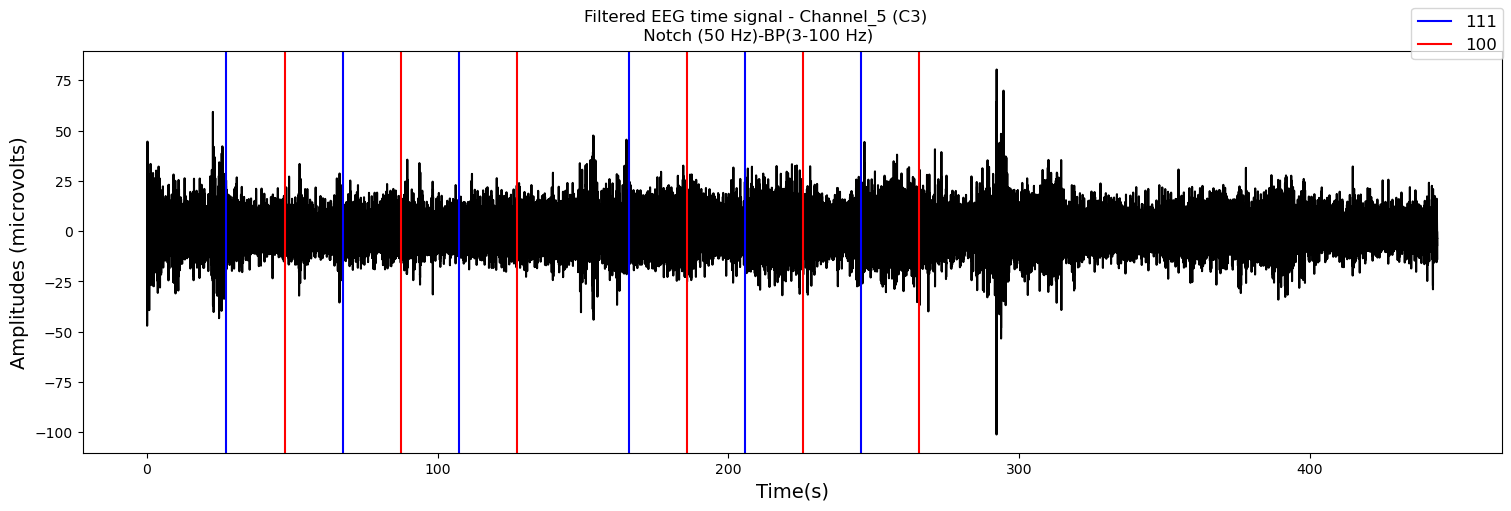

In [12]:
EEG_amplitudes_centered_filtered, filt_freqs, filt_response = filter_signal(input_signals=EEG_amplitudes_rereferenced, sample_rate=EEG_srate, order=8, cutofffreq=(3, 100, 50))

figure,axis=plt.subplots()
figure.suptitle(f"Filtered EEG time signal - {channel_num_name} ({channel_name})\n Notch (50 Hz)-BP(3-100 Hz)")
axis.plot(EEG_timestamps,EEG_amplitudes_centered_filtered[:,channel_index],color="black")
axis.set_xlabel("Time(s)")
axis.set_ylabel(f"Amplitudes ({EEG_units})")
show_markers2(plot_type=axis,markers_times_array=mouse_marker_times_labels)
figure.legend()

## Epoch EEG signals and show result on one signal

In [13]:
epoch_limits = (0, 4)
epoch_num=6
epoch_index=epoch_num-1
    
nearest_markers_array = nearest_timestamps_array_finder(
    signal_times_stamps=EEG_timestamps, markers=mouse_marker_times_labels)

MARKERS LEN: 12


221938
Epoch limits relative to events (in sec): start: 0s - end: 4s
Epoch limits relative to events (in samples): n_points_before_marker: 0.0 - n_points_after_marker: 1999.990908174066
Event type : 111 ------------ epochs :
first_seg_coord: 13659 - second_seg_coord: 15658
first_seg_coord: 33660 - second_seg_coord: 35659
first_seg_coord: 53662 - second_seg_coord: 55661
first_seg_coord: 82834 - second_seg_coord: 84833
first_seg_coord: 102836 - second_seg_coord: 104835
first_seg_coord: 122837 - second_seg_coord: 124836
signal_segments shape: (2000, 6)
time_segments shape: (2000, 6)
Event type : 100 ------------ epochs :
first_seg_coord: 23660 - second_seg_coord: 25659
first_seg_coord: 43661 - second_seg_coord: 45660
first_seg_coord: 63663 - second_seg_coord: 65662
first_seg_coord: 92835 - second_seg_coord: 94834
first_seg_coord: 112837 - second_seg_coord: 114836
first_seg_coord: 132838 - second_seg_coord: 134837
signal_segments shape: (2000, 6)
time_segments shape: (2000, 6)
221938
Epoch

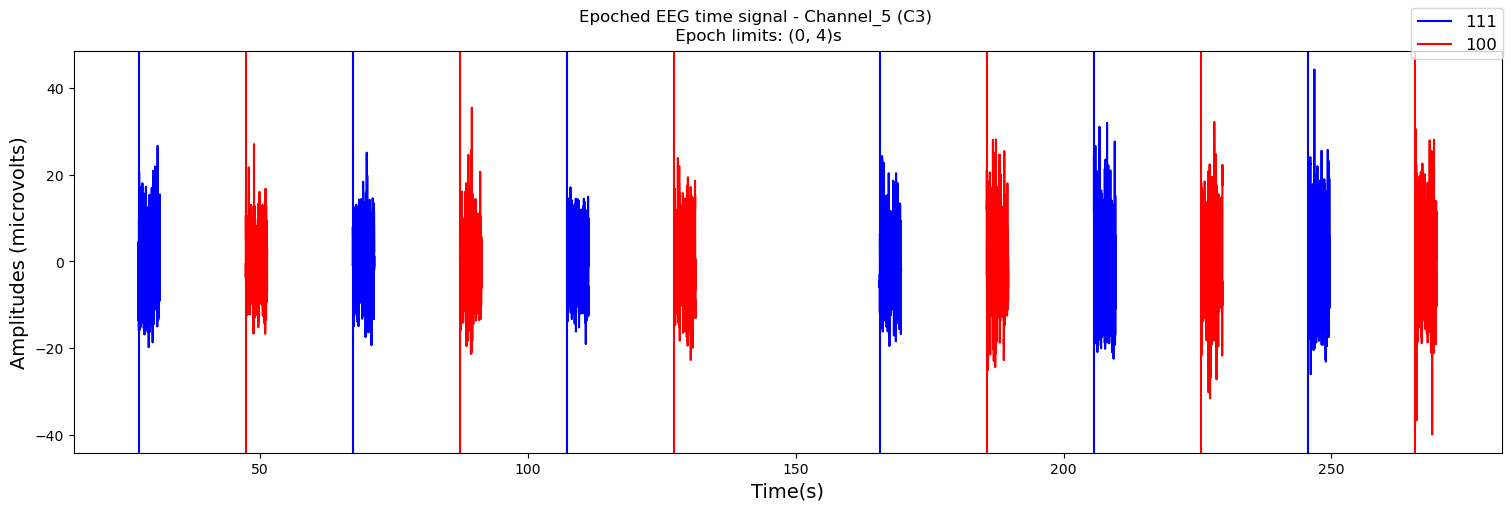

In [14]:
EEG_signals_epoched = extract_data_epochs_from_all_signals(signals=EEG_amplitudes_centered_filtered,sample_rate=EEG_srate,
                                                           markers_labels_times=nearest_markers_array,select_events=(111, 100),
                                                           epoch_limits=epoch_limits)
                                                                                 
figure,axis=plt.subplots()
figure.suptitle(f"Epoched EEG time signal - {channel_num_name} ({channel_name})\n Epoch limits: {epoch_limits}s")
axis.plot(EEG_signals_epoched[channel_num_name]["Epochs"]["time_signals"]["label_111"]["time_segments"],
          EEG_signals_epoched[channel_num_name]["Epochs"]["time_signals"]["label_111"]["signal_segments"],color="blue")
axis.plot(EEG_signals_epoched[channel_num_name]["Epochs"]["time_signals"]["label_100"]["time_segments"],
          EEG_signals_epoched[channel_num_name]["Epochs"]["time_signals"]["label_100"]["signal_segments"],color="red")
axis.set_xlabel("Time(s)")
axis.set_ylabel(f"Amplitudes ({EEG_units})")
show_markers2(plot_type=axis,markers_times_array=mouse_marker_times_labels)
figure.legend()

## Compute PSD of epoched EEG signals and show results on one signal for two successive events

segments shapes to psd - (2000, 6)
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
segments shapes to psd - (2000, 6)
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
segments shapes to psd - (2000, 6)
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
segments shapes to psd - (2000, 6)
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
segments shapes to psd - (2000, 6)
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
segments shapes to psd - (2000, 6)
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
segments shapes to psd - (2000, 6)
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
segments shapes to psd - (2000, 6)
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
segments shapes to psd - (2000, 6)
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221

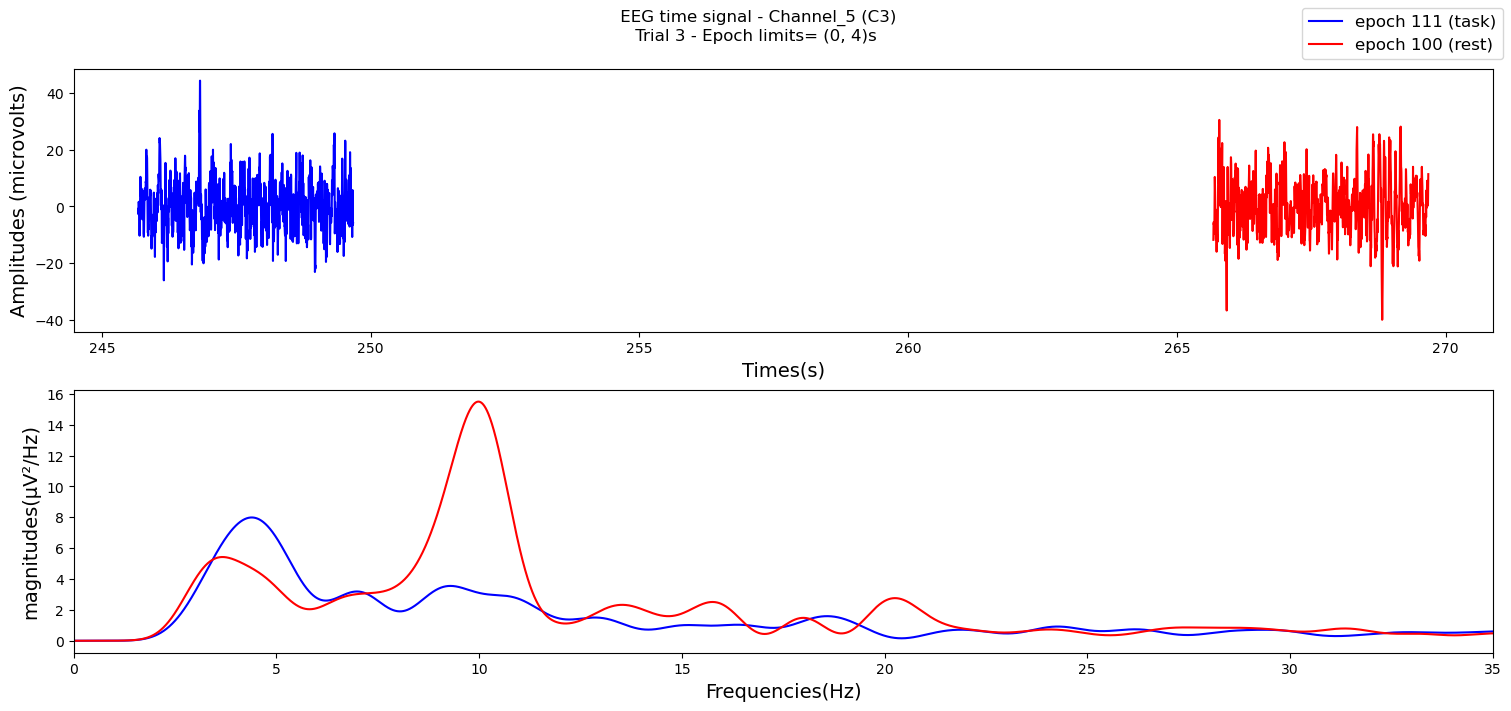

In [15]:
EEG_signals_epochs_psds = compute_psds_for_each_epoch_all_signals(input_dict=EEG_signals_epoched, sample_rate=EEG_srate, nfft=len(EEG_amplitudes_centered_filtered))

figure,axis=plt.subplots(2,figsize=(15,7))
figure.suptitle(f" EEG time signal - {channel_num_name} ({channel_name})\n Trial 3 - Epoch limits= {epoch_limits}s \n")

axis[0].set_xlabel("Times(s)")
axis[0].set_ylabel(f"Amplitudes ({EEG_units})")
axis[0].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_111"]["time_segments"][:,epoch_index],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_111"]["signal_segments"][:,epoch_index],color="blue",label="epoch 111 (task)")

axis[0].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_100"]["time_segments"][:,epoch_index],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_100"]["signal_segments"][:,epoch_index],color="red",label="epoch 100 (rest)")   

axis[1].set_xlabel("Frequencies(Hz)")
axis[1].set_ylabel("magnitudes(µV²/Hz)")
axis[1].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_111"]["PSD_frequencies"][:,epoch_index],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_111"]["PSD_magnitudes"][:,epoch_index],color="blue")
axis[1].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_100"]["PSD_frequencies"][:,epoch_index],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_100"]["PSD_magnitudes"][:,epoch_index],color="red")
axis[1].set_xlim(0,35)

#show_markers2(plot_type=axis,markers_times_array=mouse_marker_times_labels)
figure.legend()

## Compute ERSP of all epochs of all EEG signals and show results on one signal for two successive events

In [16]:
rest_psd=EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_100"]["PSD_magnitudes"]
task_psd=EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_111"]["PSD_magnitudes"]
frequencies=EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_111"]["PSD_frequencies"][:,epoch_index]
print(np.unique(rest_psd==task_psd))
print(np.shape(frequencies))

ERSP=compute_ERSPs_via_events_psds(reference_PSDs=rest_psd,event_PSDs=task_psd)
mean_ersp=np.mean(ERSP[:,4:7],axis=1)

[False]
(110970,)


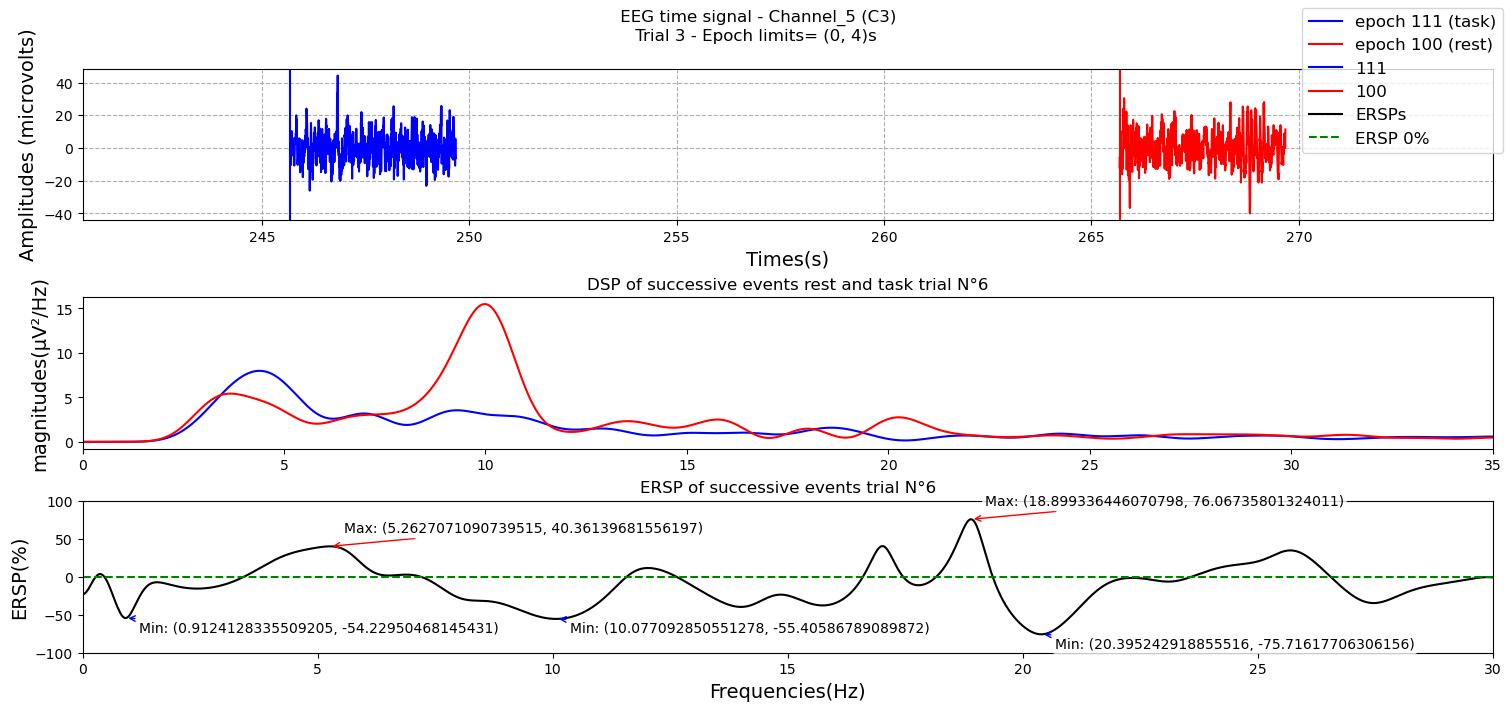

In [17]:
figure,axis=plt.subplots(3,figsize=(15,7),layout="constrained")
figure.suptitle(f" EEG time signal - {channel_num_name} ({channel_name})\n Trial 3 - Epoch limits= {epoch_limits}s \n")

axis[0].set_xlabel("Times(s)")
axis[0].set_ylabel(f"Amplitudes ({EEG_units})")
axis[0].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_111"]["time_segments"][:,epoch_index],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_111"]["signal_segments"][:,epoch_index],color="blue",label="epoch 111 (task)")
axis[0].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_100"]["time_segments"][:,epoch_index],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_100"]["signal_segments"][:,epoch_index],color="red",label="epoch 100 (rest)")   
axis[0].set_xlim(np.min(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_111"]["time_segments"][:,epoch_index])-5,
                 np.max(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_100"]["time_segments"][:,epoch_index])+5)
axis[0].grid(which="both", axis="both", linestyle="--")

show_markers2(plot_type=axis[0],markers_times_array=mouse_marker_times_labels)

axis[1].set_title(f"DSP of successive events rest and task trial N°{epoch_num}")
axis[1].set_ylabel("magnitudes(µV²/Hz)")
axis[1].plot(frequencies,EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_111"]["PSD_magnitudes"][:,epoch_index],color="blue")
axis[1].plot(frequencies,EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_100"]["PSD_magnitudes"][:,epoch_index],color="red")
axis[1].set_xlim(0,35)

axis[2].set_title(f"ERSP of successive events trial N°{epoch_num}")
axis[2].set_xlabel("Frequencies(Hz)")
axis[2].set_ylabel("ERSP(%)")
axis[2].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_100"]["PSD_frequencies"][:,epoch_index],
             ERSP[:,epoch_index],color="black",label="ERSPs")
axis[2].axhline(y = 0, color = 'green', linestyle = '--',label="ERSP 0% ")
axis[2].set_xlim(0,30)
axis[2].set_ylim(-100,100)

annotate_local_extrema(axis=axis[2],x=EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_111"]["PSD_frequencies"][:,epoch_index],
                       y=ERSP[:,epoch_index],order=3000)



figure.legend()

## Show the PSD of all epochs of one signal and averaged ERSPs over each block

In [18]:
#average DSPs on blocks
mean_psd_block1_111=np.mean(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_111"]["PSD_magnitudes"][:,0:3],axis=1)
mean_psd_block1_100=np.mean(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_100"]["PSD_magnitudes"][:,0:3],axis=1)

mean_psd_block2_111=np.mean(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_111"]["PSD_magnitudes"][:,3:7],axis=1)
mean_psd_block2_100=np.mean(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_100"]["PSD_magnitudes"][:,3:7],axis=1)

#average ERSPs on blocks
mean_ersp_block1=np.mean(ERSP[:,0:3],axis=1)
print(np.shape(mean_ersp_block1))
mean_ersp_block2=np.mean(ERSP[:,3:7],axis=1)

(110970,)


(110970,)
(110970,)


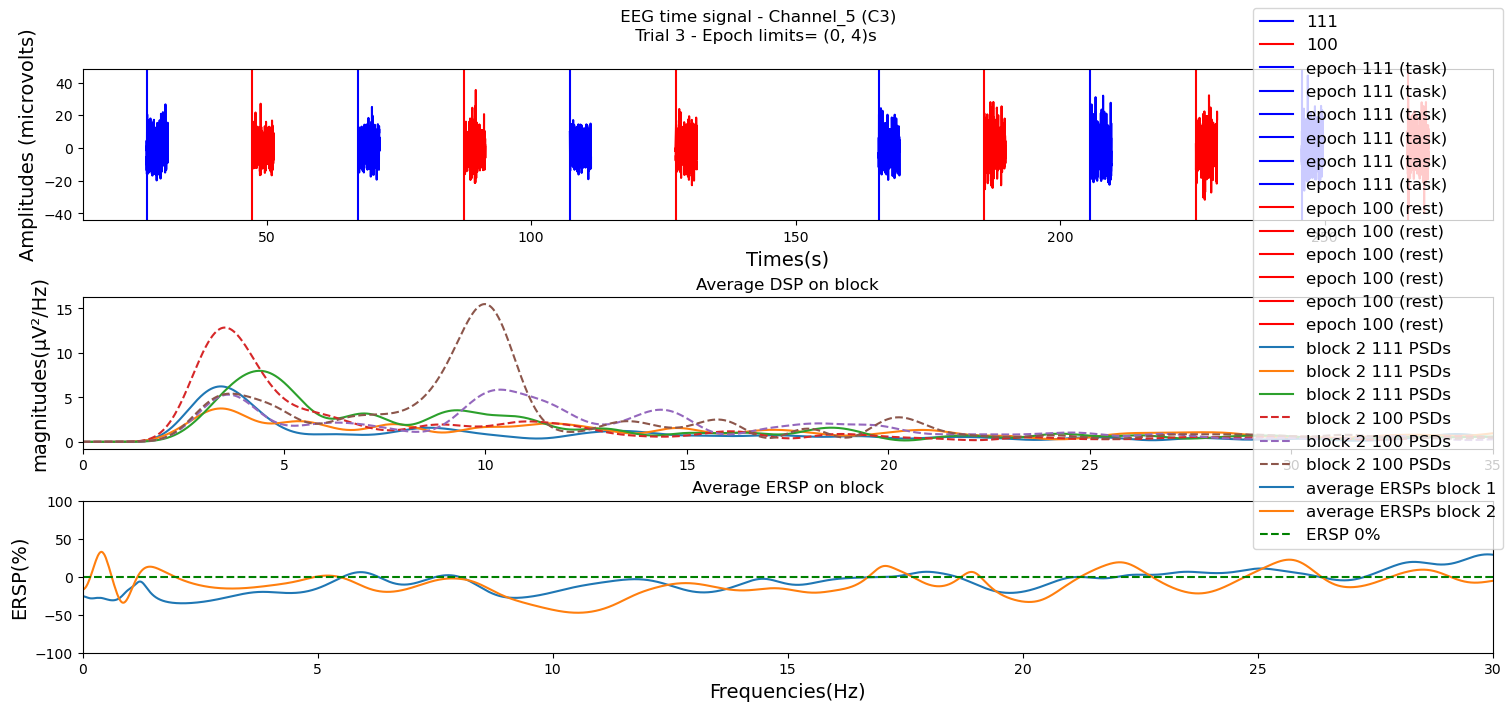

In [19]:
print(np.shape(mean_psd_block1_111))
print(np.shape(mean_psd_block1_100))
figure,axis=plt.subplots(3,figsize=(15,7))
figure.suptitle(f" EEG time signal - {channel_num_name} ({channel_name})\n Trial 3 - Epoch limits= {epoch_limits}s \n")

axis[0].set_xlabel("Times(s)")
axis[0].set_ylabel(f"Amplitudes ({EEG_units})")
show_markers2(plot_type=axis[0],markers_times_array=mouse_marker_times_labels)
axis[0].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_111"]["time_segments"],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_111"]["signal_segments"],
             color="blue",label="epoch 111 (task)")

axis[0].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_100"]["time_segments"],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_100"]["signal_segments"],
             color="red",label="epoch 100 (rest)")   

axis[1].set_title(f"Average DSP on block")
axis[1].set_ylabel("magnitudes(µV²/Hz)")


axis[1].plot(frequencies,EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_111"]["PSD_magnitudes"][:,3:7],label="block 2 111 PSDs")
axis[1].plot(frequencies,EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_100"]["PSD_magnitudes"][:,3:7],label="block 2 100 PSDs",linestyle="--")
axis[1].set_xlim(0,35)

axis[2].set_title(f"Average ERSP on block")
axis[2].set_xlabel("Frequencies(Hz)")
axis[2].set_ylabel("ERSP(%)")
axis[2].plot(frequencies,mean_ersp_block1,label="average ERSPs block 1")
axis[2].plot(frequencies,mean_ersp_block2,label="average ERSPs block 2")
axis[2].axhline(y = 0, color = 'green', linestyle = '--',label="ERSP 0% ")
axis[2].set_xlim(0,30)
axis[2].set_ylim(-100,100)
figure.legend()


## Show averaged PSD of all epochs of one signal and averaged ERSPs over block 2 (right arm sollicitation)

(110970,)
(110970,)


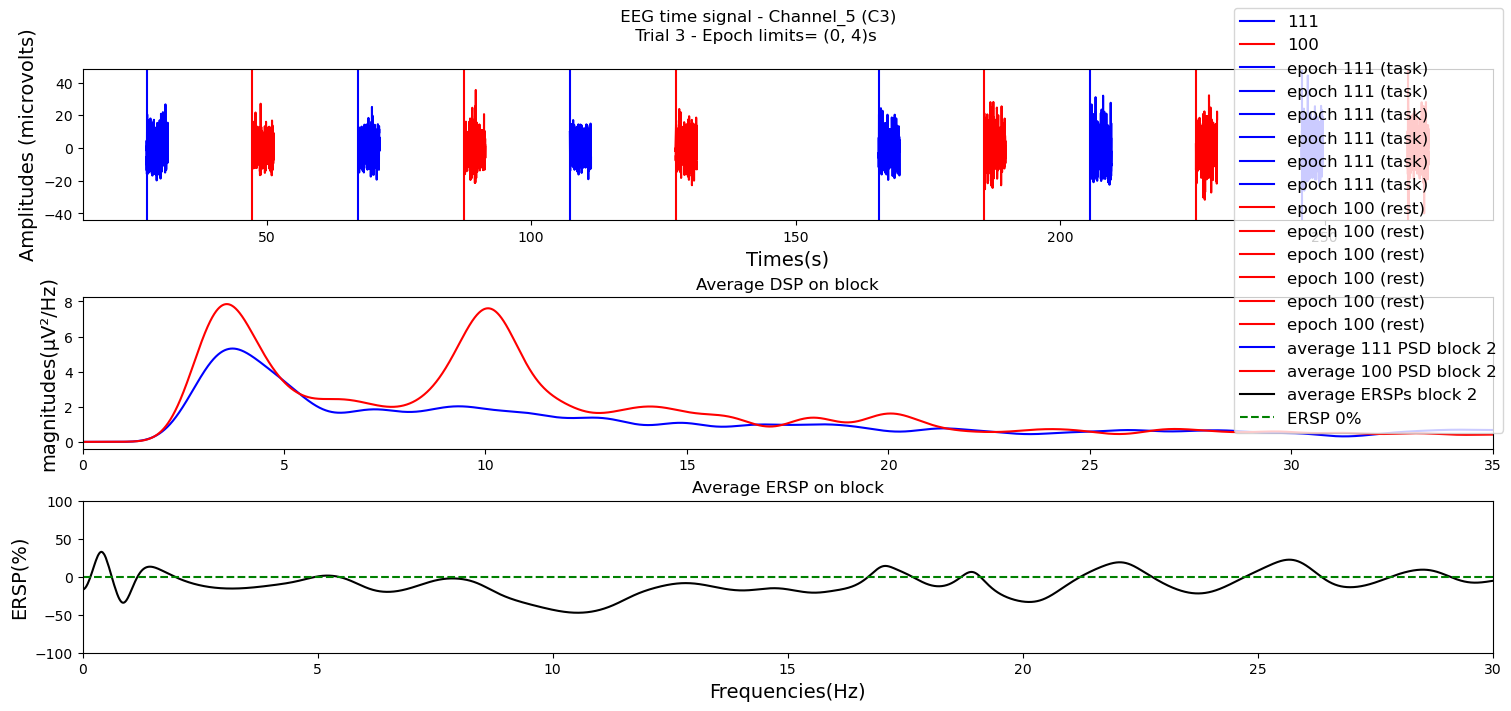

In [20]:
print(np.shape(mean_psd_block1_111))
print(np.shape(mean_psd_block1_100))
figure,axis=plt.subplots(3,figsize=(15,7))
figure.suptitle(f" EEG time signal - {channel_num_name} ({channel_name})\n Trial 3 - Epoch limits= {epoch_limits}s \n")

axis[0].set_xlabel("Times(s)")
axis[0].set_ylabel(f"Amplitudes ({EEG_units})")
show_markers2(plot_type=axis[0],markers_times_array=mouse_marker_times_labels)
axis[0].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_111"]["time_segments"],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_111"]["signal_segments"],
             color="blue",label="epoch 111 (task)")

axis[0].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_100"]["time_segments"],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_100"]["signal_segments"],
             color="red",label="epoch 100 (rest)")   

axis[1].set_title(f"Average DSP on block")
axis[1].set_ylabel("magnitudes(µV²/Hz)")


axis[1].plot(frequencies,mean_psd_block2_111,color="blue",label="average 111 PSD block 2")
axis[1].plot(frequencies,mean_psd_block2_100,color="red",label="average 100 PSD block 2")
axis[1].set_xlim(0,35)

axis[2].set_title(f"Average ERSP on block")
axis[2].set_xlabel("Frequencies(Hz)")
axis[2].set_ylabel("ERSP(%)")
axis[2].plot(frequencies,mean_ersp_block2,color="black",label="average ERSPs block 2")
axis[2].axhline(y = 0, color = 'green', linestyle = '--',label="ERSP 0% ")
axis[2].set_xlim(0,30)
axis[2].set_ylim(-100,100)
figure.legend()
